## Open Source Data Repositories
1. [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) - Small, manageable and standard datasets from almost all domains

2. [USA data.gov Initiative](https://www.data.gov/) - US government open-sourced data. Lots of untapped potential.

3. [World Bank Data](https://data.worldbank.org/) - Econometric, administrative and credit data for almost all countries. Low granularity(less data points), high latency (slow updates).

4. [Quandl](https://www.quandl.com/) - Fianancial and Econometric data. High granularity, low latency(nightly updates).

5. [Kaggle Datasets](https://www.kaggle.com/datasets) - Pretty much everything. Good forum conversations.  

## PIMA Indian Diabetes Data - UCI
You can access the Diabetes Data and its relevant documentation [here on UCI website](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)

In [1]:
import pandas as pd

diabetes = pd.read_csv("E:/PGA/python/pima_indians_diabetes.csv" , names = ['Pregnancies','Glucose','Blood_Pressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'])

diabetes.head()

,Pregnancies,Glucose,Blood_Pressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Exploration

## 1. Check if the data types are as expected

In [2]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
Blood_Pressure                int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [3]:
# changing outcome to categorical

diabetes['Outcome']= diabetes['Outcome'].astype('category')
diabetes.dtypes

Pregnancies                    int64
Glucose                        int64
Blood_Pressure                 int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                     category
dtype: object

In [4]:
diabetes.shape

(768, 9)

## 2. Memory optimizations

In [5]:
# checking memory usage
diabetes.memory_usage()

Index                         80
Pregnancies                 6144
Glucose                     6144
Blood_Pressure              6144
SkinThickness               6144
Insulin                     6144
BMI                         6144
DiabetesPedigreeFunction    6144
Age                         6144
Outcome                      864
dtype: int64

In [6]:
diabetes.iloc[:,[0,1,2,3,4]] = diabetes.iloc[:,[0,1,2,3,4,7]].astype('int16')
 
diabetes.iloc[:,[5,6]] = diabetes.iloc[:,[5,6]].astype('float16')

diabetes.memory_usage()

Index                         80
Pregnancies                 1536
Glucose                     1536
Blood_Pressure              1536
SkinThickness               1536
Insulin                     1536
BMI                         1536
DiabetesPedigreeFunction    1536
Age                         6144
Outcome                      864
dtype: int64

## 3. Check summary statistics

In [7]:
diabetes.describe()

,Pregnancies,Glucose,Blood_Pressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,32.000000,0.471924,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.882812,0.331299,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078003,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.296875,0.243774,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372559,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.593750,0.626221,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.125000,2.419922,81.000000


## 4. Check for Outliers

In [8]:
import matplotlib.pylab as plt
import seaborn as sns

sns.boxplot(data=diabetes,orient='h',palette='Set2')
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

<function matplotlib.pyplot.show(*args, **kw)>

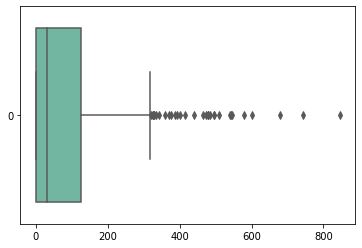

In [9]:
sns.boxplot(data=diabetes['Insulin'],orient='h',palette='Set2')
plt.show

## Dealing with Outliers

In [10]:
import numpy as np

q1,q3 = np.percentile(diabetes['Insulin'],[25,75])
iqr = q3-q1
whisker = q3 + (1.5*iqr)
print(whisker)

318.125


In [11]:
diabetes['Insulin'] = diabetes['Insulin'].clip(upper=whisker)

<function matplotlib.pyplot.show(*args, **kw)>

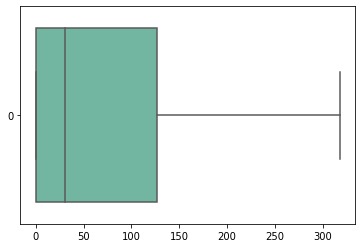

In [12]:
sns.boxplot(data=diabetes['Insulin'],orient='h',palette='Set2')
plt.show

## 5. Check missing values

In [13]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
Blood_Pressure              0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
(diabetes.iloc[:,[1,2,3,4,5]]== 0).sum()

Glucose             5
Blood_Pressure     35
SkinThickness     227
Insulin           374
BMI                11
dtype: int64

In [15]:
# replacing 0 with nan
diabetes.iloc[:,[1,2,3,4,5]]= diabetes.iloc[:,[1,2,3,4,5]].replace(0,np.NaN)
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
Blood_Pressure               35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# Dealing with Missing Values

## A) Drop rows having NaN

In [16]:
nan_dropped = diabetes.dropna()
nan_dropped.shape

(392, 9)

## Drop row/columns having more than certain percentage of NaNs

In [17]:
## Dropping rows with more than 25% NA values
dropped_diabetes = diabetes.loc[diabetes.isnull().mean(axis=1) < 0.25]
print(dropped_diabetes.shape)

## Dropping cols with more than 30% NA values
dropped_diabetes = dropped_diabetes.loc[:,dropped_diabetes.isnull().mean(axis=0) < 0.30]

(733, 9)


## B) Impute missing values
1. Some constant value that is considered "normal" in the domain
2. Summary statistic like Mean, Median, Mode
3. **A value estimated by algorithm or predictive model** - Will be taught later. Don't get ahead of yourself or you'll miss the real fun ;)

In [18]:
dropped_diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
Blood_Pressure                2
SkinThickness               192
BMI                           2
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [19]:
dropped_diabetes.describe()

,Pregnancies,Glucose,Blood_Pressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
count,733.000000,728.000000,731.000000,541.000000,731.000000,733.000000,733.000000
mean,3.858117,121.811813,72.359781,29.153420,32.468750,0.476562,33.287858
std,3.372025,30.702845,12.363134,10.476982,6.882812,0.334229,11.749216
min,0.000000,44.000000,24.000000,7.000000,18.203125,0.078003,21.000000
25%,1.000000,99.750000,64.000000,22.000000,27.500000,0.244995,24.000000
50%,3.000000,117.000000,72.000000,29.000000,32.406250,0.379883,29.000000
75%,6.000000,141.250000,80.000000,36.000000,36.593750,0.628906,41.000000
max,17.000000,199.000000,122.000000,99.000000,67.125000,2.419922,81.000000


In [20]:
dropped_diabetes.dtypes

Pregnancies                    int16
Glucose                      float64
Blood_Pressure               float64
SkinThickness                float64
BMI                          float16
DiabetesPedigreeFunction     float16
Age                            int64
Outcome                     category
dtype: object

In [21]:
imputed_data = dropped_diabetes.fillna(dropped_diabetes.mode())

In [22]:
#
#Decoupling target

y = imputed_data['Outcome']
X = imputed_data[dropped_diabetes.columns.difference(['Outcome'])]

#
#
# Train - Test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.33 , random_state=42)


In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 7)
(242, 7)
(491,)
(242,)


In [24]:
# imputing

from sklearn.preprocessing import Imputer     ##import constructor
mean_imputer = Imputer(strategy="mean")     ## create object
mean_imputer.fit(X_train)                   ## learn from train data   
X_train_imputed = pd.DataFrame(mean_imputer.transform(X_train),columns=X_train.columns)
X_test_imputed = pd.DataFrame(mean_imputer.transform(X_test),columns=X_test.columns)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [25]:
X_train.isnull().sum()

Age                           0
BMI                           1
Blood_Pressure                1
DiabetesPedigreeFunction      0
Glucose                       1
Pregnancies                   0
SkinThickness               117
dtype: int64

In [26]:
X_train_imputed.isnull().sum()

Age                         0
BMI                         0
Blood_Pressure              0
DiabetesPedigreeFunction    0
Glucose                     0
Pregnancies                 0
SkinThickness               0
dtype: int64

### Important Take-Away - *Transformations should be applied in a 2-phase strategy*

## 5. Range Scaling

In [27]:
from sklearn import preprocessing

In [28]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(X_train_imputed)
scaled_df = pd.DataFrame(scaled_df, columns=['Pregnancies','Glucose','Blood_Pressure',
                                             'SkinThickness','BMI','DiabetesPedigreeFunction','Age'])

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


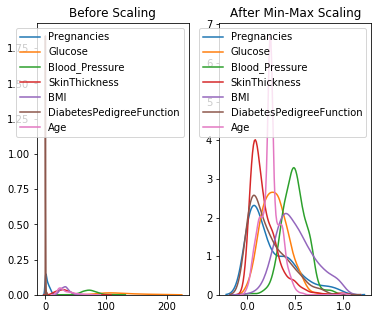

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(dropped_diabetes['Pregnancies'], ax=ax1)
sns.kdeplot(dropped_diabetes['Glucose'], ax=ax1)
sns.kdeplot(dropped_diabetes['Blood_Pressure'], ax=ax1)
sns.kdeplot(dropped_diabetes['SkinThickness'], ax=ax1)
sns.kdeplot(dropped_diabetes['BMI'], ax=ax1)
sns.kdeplot(dropped_diabetes['DiabetesPedigreeFunction'], ax=ax1)
sns.kdeplot(dropped_diabetes['Age'], ax=ax1)

ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['Pregnancies'], ax=ax2)
sns.kdeplot(scaled_df['Glucose'], ax=ax2)
sns.kdeplot(scaled_df['Blood_Pressure'], ax=ax2)
sns.kdeplot(scaled_df['SkinThickness'], ax=ax2)
sns.kdeplot(scaled_df['BMI'], ax=ax2)
sns.kdeplot(scaled_df['DiabetesPedigreeFunction'], ax=ax2)
sns.kdeplot(scaled_df['Age'], ax=ax2)

plt.show()

In [30]:
from sklearn.preprocessing import MinMaxScaler     ##import constructor
range_scaler = MinMaxScaler()   ## create object
range_scaler.fit(X_train)                   ## learn from train data   
X_train_scaler = pd.DataFrame(range_scaler.transform(X_train),columns=X_train.columns)
X_test_scaler = pd.DataFrame(range_scaler.transform(X_test),columns=X_test.columns)

In [31]:
X_train_scaler.describe()

,Age,BMI,Blood_Pressure,DiabetesPedigreeFunction,Glucose,Pregnancies,SkinThickness
count,491.000000,490.000000,490.000000,491.000000,490.000000,491.000000,374.000000
mean,0.249321,0.289956,0.492274,0.178584,0.507979,0.216245,0.240264
std,0.236534,0.140035,0.127151,0.150386,0.197520,0.192132,0.117486
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.188119,0.408163,0.075544,0.361290,0.058824,0.152174
50%,0.166667,0.282019,0.489796,0.136440,0.470968,0.176471,0.239130
75%,0.395833,0.379751,0.571429,0.250258,0.638710,0.352941,0.323370
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 6. Standardization

In [32]:
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(X_train_imputed)
standard_df = pd.DataFrame(scaled_df, columns=['Pregnancies','Glucose','Blood_Pressure',
                                             'SkinThickness','BMI','DiabetesPedigreeFunction','Age'])

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


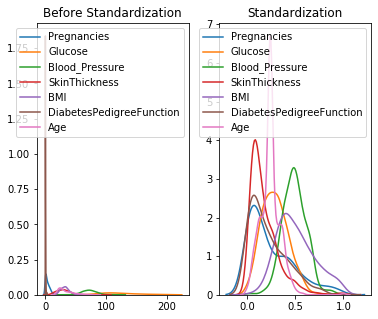

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Standardization')
sns.kdeplot(dropped_diabetes['Pregnancies'], ax=ax1)
sns.kdeplot(dropped_diabetes['Glucose'], ax=ax1)
sns.kdeplot(dropped_diabetes['Blood_Pressure'], ax=ax1)
sns.kdeplot(dropped_diabetes['SkinThickness'], ax=ax1)
sns.kdeplot(dropped_diabetes['BMI'], ax=ax1)
sns.kdeplot(dropped_diabetes['DiabetesPedigreeFunction'], ax=ax1)
sns.kdeplot(dropped_diabetes['Age'], ax=ax1)

ax2.set_title('Standardization')
sns.kdeplot(standard_df['Pregnancies'], ax=ax2)
sns.kdeplot(standard_df['Glucose'], ax=ax2)
sns.kdeplot(standard_df['Blood_Pressure'], ax=ax2)
sns.kdeplot(standard_df['SkinThickness'], ax=ax2)
sns.kdeplot(standard_df['BMI'], ax=ax2)
sns.kdeplot(standard_df['DiabetesPedigreeFunction'], ax=ax2)
sns.kdeplot(standard_df['Age'], ax=ax2)

plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler    ##import constructor
std_scaler = StandardScaler()   ## create object
std_scaler.fit(X_train)                   ## learn from train data   
X_train_std = pd.DataFrame(std_scaler.transform(X_train),columns=X_train.columns)
X_test_std = pd.DataFrame(std_scaler.transform(X_test),columns=X_test.columns)

In [35]:
X_train_std.describe()

,Age,BMI,Blood_Pressure,DiabetesPedigreeFunction,Glucose,Pregnancies,SkinThickness
count,4.910000e+02,4.900000e+02,4.900000e+02,4.910000e+02,4.900000e+02,4.910000e+02,3.740000e+02
mean,-1.189363e-16,3.867654e-16,-3.539119e-16,-2.781210e-17,4.531523e-18,-6.964332e-17,-9.558605e-17
std,1.001020e+00,1.001022e+00,1.001022e+00,1.001020e+00,1.001022e+00,1.001020e+00,1.001340e+00
min,-1.055135e+00,-2.072704e+00,-3.875518e+00,-1.188714e+00,-2.574413e+00,-1.126650e+00,-2.047782e+00
25%,-7.906330e-01,-7.279649e-01,-6.621777e-01,-6.858690e-01,-7.434109e-01,-8.201761e-01,-7.507957e-01
50%,-3.497963e-01,-5.673706e-02,-1.950957e-02,-2.805236e-01,-1.875710e-01,-2.072287e-01,-9.660519e-03
75%,6.200444e-01,6.418878e-01,6.231586e-01,4.770841e-01,6.625372e-01,7.121925e-01,7.083142e-01
max,3.176897e+00,5.075644e+00,3.997166e+00,5.467617e+00,2.493539e+00,4.083404e+00,6.475273e+00


## 7. Binning

In [36]:
bins = [0,25,30,35,40,100]
group_names = ["malnutrition","Under-weight","Healthy","Over-weight","Obese"]
imputed_data['BMI Class'] = pd.cut(imputed_data['BMI'],bins,labels=group_names)

In [37]:
dropped_diabetes.head()

,Pregnancies,Glucose,Blood_Pressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,33.593750,0.626953,50,1
1,1,85.0,66.0,29.0,26.593750,0.351074,31,0
2,8,183.0,64.0,NaN,23.296875,0.671875,32,1
3,1,89.0,66.0,23.0,28.093750,0.166992,21,0
4,0,137.0,40.0,35.0,43.093750,2.287109,33,1


## 8. Variable encoding (Dummification)

In [38]:
dummy_col = pd.get_dummies(imputed_data, columns=['BMI Class'])

In [39]:
dummy_col.head()

,Pregnancies,Glucose,Blood_Pressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI Class_malnutrition,BMI Class_Under-weight,BMI Class_Healthy,BMI Class_Over-weight,BMI Class_Obese
0,6,148.0,72.0,35.0,33.593750,0.626953,50,1,0,0,1,0,0
1,1,85.0,66.0,29.0,26.593750,0.351074,31,0,0,1,0,0,0
2,8,183.0,64.0,NaN,23.296875,0.671875,32,1,1,0,0,0,0
3,1,89.0,66.0,23.0,28.093750,0.166992,21,0,0,1,0,0,0
4,0,137.0,40.0,35.0,43.093750,2.287109,33,1,0,0,0,0,1
